<a href="https://colab.research.google.com/github/Pallavi20-git/SCT_DS_1/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

print(train.shape)
print(train.info())
print(train.describe())
train.head()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(train.isnull().sum())

train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train.drop(columns=['Cabin'], inplace=True)

train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-2-1559062539.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipython-input-2-1559062539.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

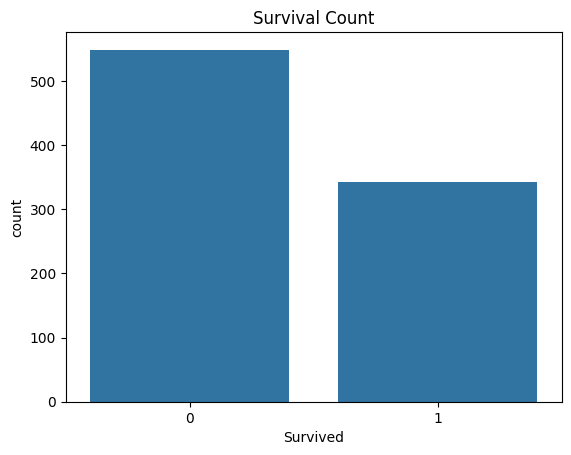

In [ ]:
sns.countplot(data=train, x='Survived')
plt.title('Survival Count')
plt.show()

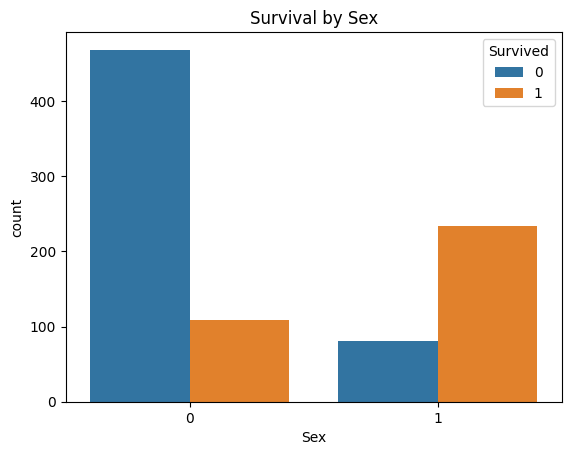

In [ ]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

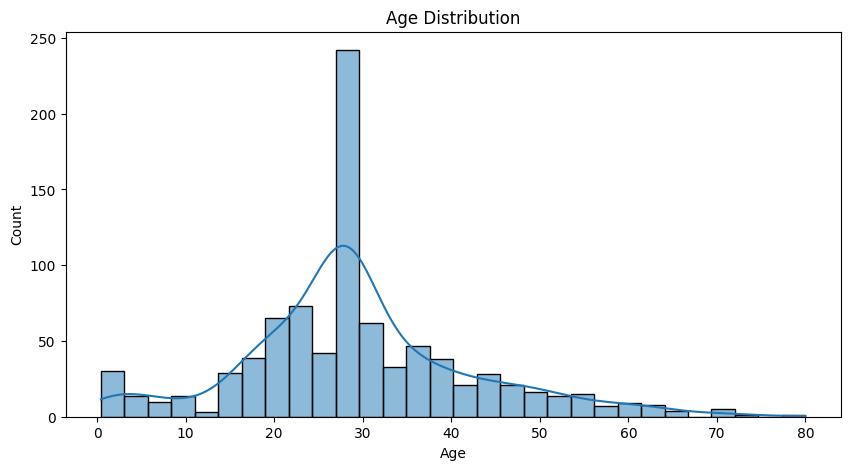

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

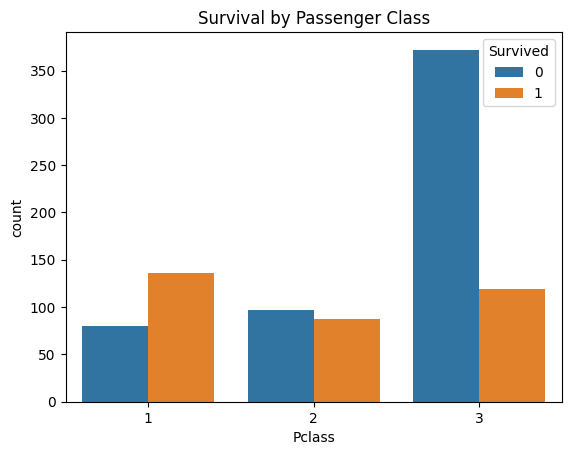

In [ ]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()


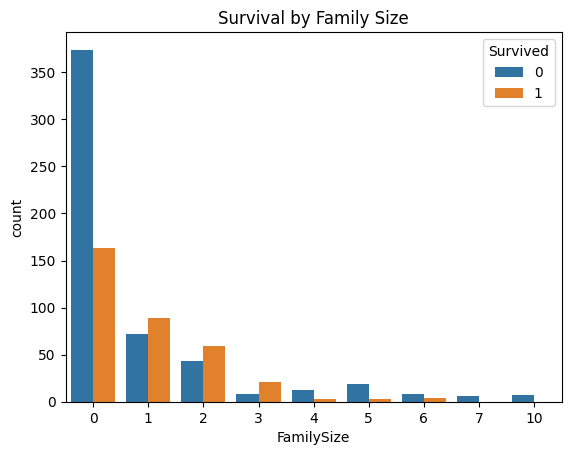

In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch']
sns.countplot(data=train, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')
plt.show()

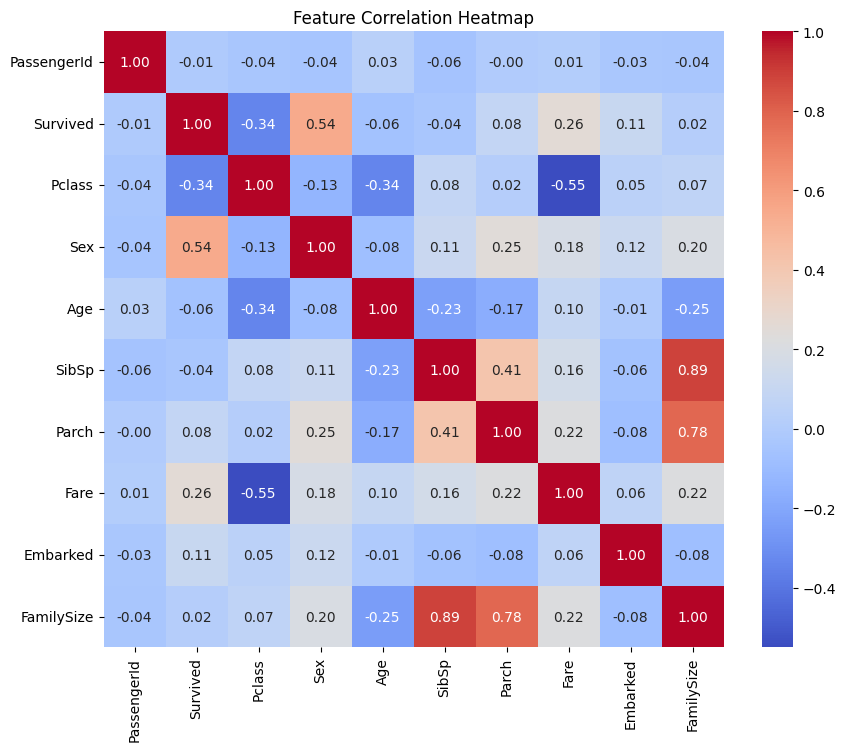

In [ ]:
numeric_df = train.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
print(train.groupby('Sex')['Survived'].mean())

print(train.groupby('Pclass')['Survived'].mean())

print(train.groupby('Embarked')['Survived'].mean())

print(train.groupby(['Pclass', 'Sex'])['Survived'].mean())

train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 100],
                           labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
print(train.groupby('AgeGroup')['Survived'].mean())

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
0    0.339009
1    0.553571
2    0.389610
Name: Survived, dtype: float64
Pclass  Sex
1       0      0.368852
        1      0.968085
2       0      0.157407
        1      0.921053
3       0      0.135447
        1      0.500000
Name: Survived, dtype: float64
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


/tmp/ipython-input-11-4093617844.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby('AgeGroup')['Survived'].mean())


/tmp/ipython-input-12-1273577349.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = train.groupby('AgeGroup')['Survived'].mean().reset_index()


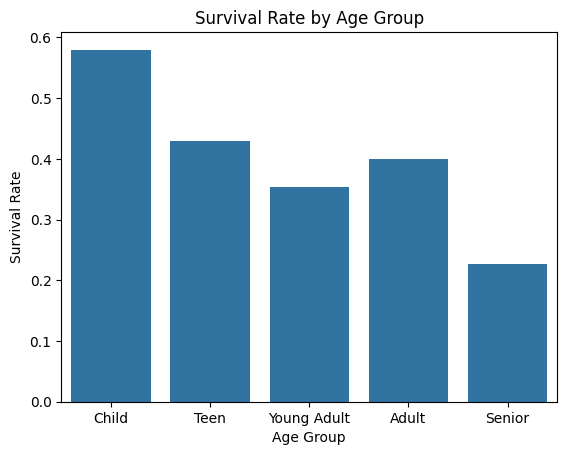

In [ ]:
agegroup_survival = train.groupby('AgeGroup')['Survived'].mean().reset_index()

sns.barplot(data=agegroup_survival, x='AgeGroup', y='Survived')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()